## ANALYSIS EXPERIMENT 2.1 (GPT2-SMALL)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
import pickle
import importlib
import os
import pickle


import sys
# custom path insertion
sys.path.append(os.path.abspath('..'))

import utils 
importlib.reload(utils)

from utils import *


[2024-07-15 08:21:14,904] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH


/opt/anaconda/anaconda3/envs/elias/compiler_compat/ld: /tmp/tmp8qqu5vy1/test.o: in function `main':
/tmp/tmp8qqu5vy1/test.c:1: undefined reference to `io_pgetevents'
collect2: error: ld returned 1 exit status


 [WARNING]  NVIDIA Inference is only supported on Ampere and newer architectures
 [WARNING]  please install triton==1.0.0 if you want to use sparse attention


In [2]:
with open('../results/experiment_2_1/experiment_2_1_2000_1000_10.json', 'r') as file: 
    data = json.load(file)

### Accuarcy plot 

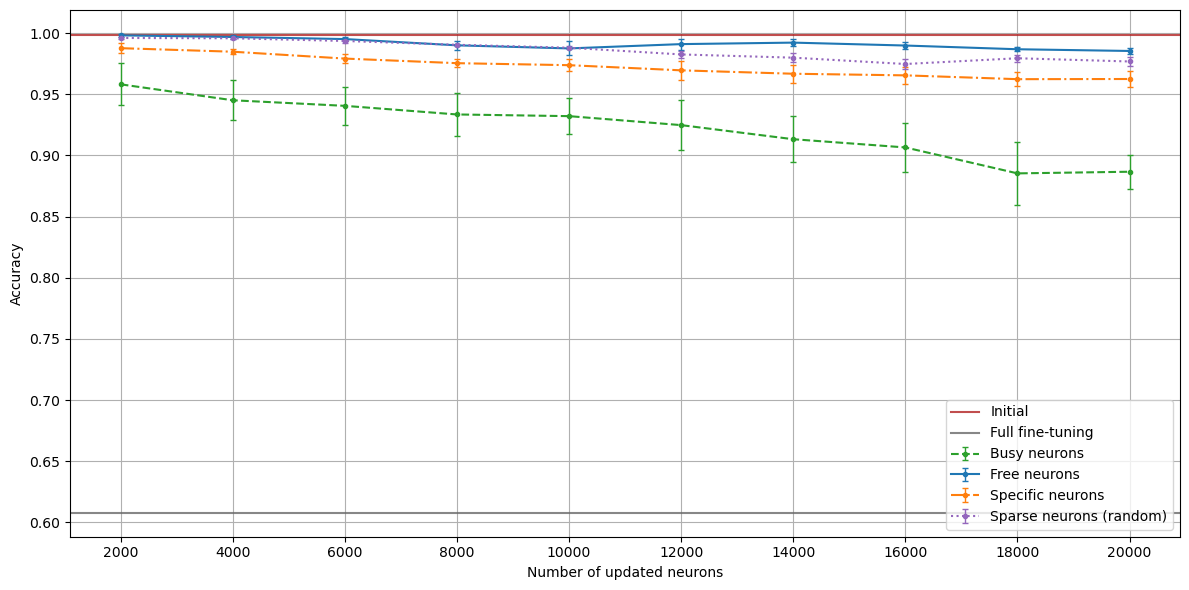

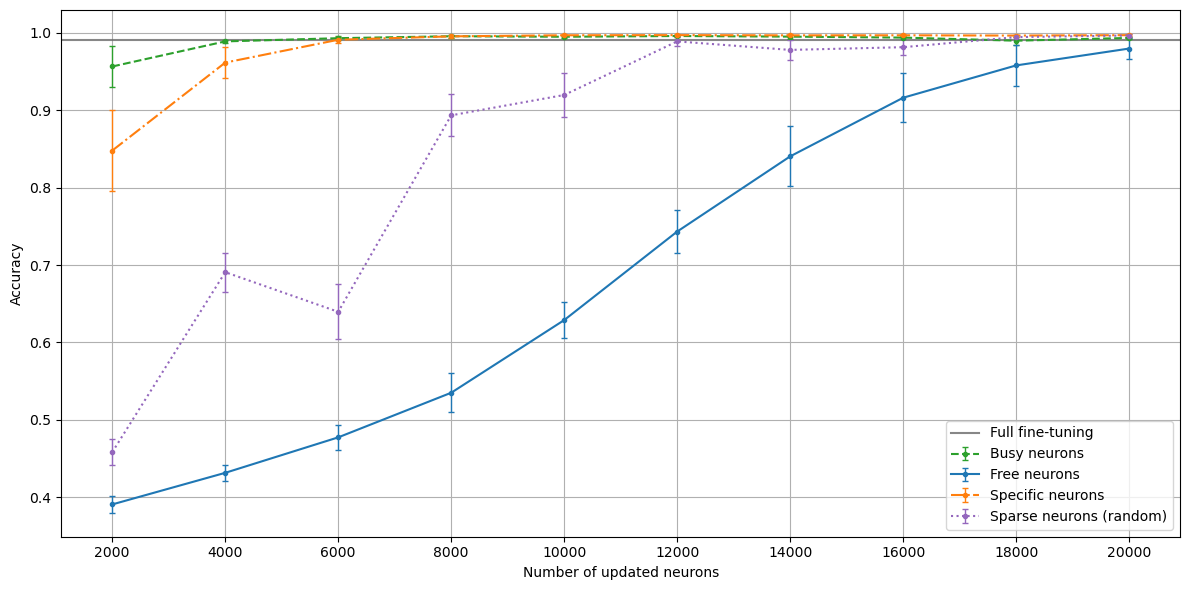

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n_folds =  len(data['results'].keys())
n_thresh = len(list(data['results'].values())[0]['cftb'].keys())

fta_accA = 0
ftb_accA = 0
ftb_accB = 0

# Arrays to store individual fold results for calculating std dev
fold_results_cftb_busy_accA = np.zeros((n_folds, n_thresh))
fold_results_cftb_busy_accB = np.zeros((n_folds, n_thresh))
fold_results_cftb_free_accA = np.zeros((n_folds, n_thresh))
fold_results_cftb_free_accB = np.zeros((n_folds, n_thresh))
fold_results_cftb_inter_gen_accA = np.zeros((n_folds, n_thresh))
fold_results_cftb_inter_gen_accB = np.zeros((n_folds, n_thresh))
fold_results_cftb_rnd_accA = np.zeros((n_folds, n_thresh))
fold_results_cftb_rnd_accB = np.zeros((n_folds, n_thresh))

for i, fold in enumerate(data['results']):
    fta_accA += data['results'][fold]['fta']['acc_A']

    ftb_accA += data['results'][fold]['ftb']['avg_accA']
    ftb_accB += data['results'][fold]['ftb']['avg_accB']

    cftb_results = data['results'][fold]['cftb']

    fold_results_cftb_busy_accA[i, :] = np.array([cftb_results[t]['busy_A']['avg_accA'] for t in cftb_results]).astype(float)
    fold_results_cftb_busy_accB[i, :] = np.array([cftb_results[t]['busy_A']['avg_accB'] for t in cftb_results]).astype(float)
    fold_results_cftb_free_accA[i, :] = np.array([cftb_results[t]['free_A']['avg_accA'] for t in cftb_results]).astype(float)
    fold_results_cftb_free_accB[i, :] = np.array([cftb_results[t]['free_A']['avg_accB'] for t in cftb_results]).astype(float)
    fold_results_cftb_inter_gen_accA[i, :] = np.array([cftb_results[t]['busy_H_spec']['avg_accA'] for t in cftb_results]).astype(float)
    fold_results_cftb_inter_gen_accB[i, :] = np.array([cftb_results[t]['busy_H_spec']['avg_accB'] for t in cftb_results]).astype(float)
    fold_results_cftb_rnd_accA[i, :] = np.array([cftb_results[t]['rnd']['avg_accA'] for t in cftb_results]).astype(float)
    fold_results_cftb_rnd_accB[i, :] = np.array([cftb_results[t]['rnd']['avg_accB'] for t in cftb_results]).astype(float)

fta_accA /= n_folds
ftb_accA /= n_folds
ftb_accB /= n_folds

cftb_free_accA = np.mean(fold_results_cftb_free_accA, axis=0)
cftb_free_accB = np.mean(fold_results_cftb_free_accB, axis=0)
cftb_busy_accA = np.mean(fold_results_cftb_busy_accA, axis=0)
cftb_busy_accB = np.mean(fold_results_cftb_busy_accB, axis=0)
cftb_inter_gen_accA = np.mean(fold_results_cftb_inter_gen_accA, axis=0)
cftb_inter_gen_accB = np.mean(fold_results_cftb_inter_gen_accB, axis=0)
cftb_rnd_accA = np.mean(fold_results_cftb_rnd_accA, axis=0)
cftb_rnd_accB = np.mean(fold_results_cftb_rnd_accB, axis=0)

# Calculate standard deviation
std_cftb_busy_accA = np.std(fold_results_cftb_busy_accA, axis=0)
std_cftb_busy_accB = np.std(fold_results_cftb_busy_accB, axis=0)
std_cftb_free_accA = np.std(fold_results_cftb_free_accA, axis=0)
std_cftb_free_accB = np.std(fold_results_cftb_free_accB, axis=0)
std_cftb_inter_gen_accA = np.std(fold_results_cftb_inter_gen_accA, axis=0)
std_cftb_inter_gen_accB = np.std(fold_results_cftb_inter_gen_accB, axis=0)
std_cftb_rnd_accA = np.std(fold_results_cftb_rnd_accA, axis=0)
std_cftb_rnd_accB = np.std(fold_results_cftb_rnd_accB, axis=0)

fig, axs = plt.subplots(1, 1, figsize=(12, 6))

# Creating custom x labels
x_labels = list(cftb_results.keys())

# First subplot
axs.axhline(y=fta_accA, color='firebrick', linestyle='solid', linewidth=1.5, alpha=0.80, label='Initial')
axs.axhline(y=ftb_accA, color='dimgrey', linestyle='solid', linewidth=1.5, alpha=0.80, label='Full fine-tuning')
axs.errorbar(x_labels, cftb_busy_accA, yerr=std_cftb_busy_accA, linestyle='--', linewidth=1.5, color='tab:green', marker='.', capsize=2, elinewidth=1, capthick=1, label='Busy neurons')
axs.errorbar(x_labels, cftb_free_accA, yerr=std_cftb_free_accA, linestyle='-', linewidth=1.5, color='tab:blue', marker='.', capsize=2, elinewidth=1, capthick=1, label='Free neurons')
axs.errorbar(x_labels, cftb_inter_gen_accA, yerr=std_cftb_inter_gen_accA, linestyle='-.',linewidth=1.5, color='tab:orange', marker='.', capsize=2, elinewidth=1, capthick=1, label='Specific neurons')
axs.errorbar(x_labels, cftb_rnd_accA, yerr=std_cftb_rnd_accA, linestyle=':', linewidth=1.5, color='tab:purple', marker='.', capsize=2, elinewidth=1, capthick=1, label='Sparse neurons (random)')
axs.set_xlabel('Number of updated neurons')
axs.set_ylabel('Accuracy')
#axs.set_title('Sequential learning experiment - Accuracy of Previous Knowledge')
axs.legend(loc='lower right')
axs.grid(True)

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(12, 6))

# Second subplot
axs.axhline(y=ftb_accB, color='dimgrey', linestyle='solid', linewidth=1.5, alpha=0.80, label='Full fine-tuning')
axs.errorbar(x_labels, cftb_busy_accB, yerr=std_cftb_busy_accB, linestyle='--', linewidth=1.5, color='tab:green', marker='.', capsize=2, elinewidth=1, capthick=1, label='Busy neurons')
axs.errorbar(x_labels, cftb_free_accB, yerr=std_cftb_free_accB, linestyle='-', linewidth=1.5, color='tab:blue', marker='.', capsize=2, elinewidth=1, capthick=1, label='Free neurons')
axs.errorbar(x_labels, cftb_inter_gen_accB, yerr=std_cftb_inter_gen_accB, linestyle='-.', linewidth=1.5, color='tab:orange', marker='.', capsize=2, elinewidth=1, capthick=1, label='Specific neurons')
axs.errorbar(x_labels, cftb_rnd_accB, yerr=std_cftb_rnd_accB, linestyle=':', linewidth=1.5, color='tab:purple', marker='.', capsize=2, elinewidth=1, capthick=1, label='Sparse neurons (random)')
axs.set_xlabel('Number of updated neurons')
axs.set_ylabel('Accuracy')
#axs.set_title('Sequential learning experiment - Accuracy of New Knowledge')
axs.legend(loc='lower right')
axs.grid(True)

plt.tight_layout()
plt.show()

### Gradients distribution plot

MAX VALUE: 0.6019504070281982
MIN VALUE: -0.48599937558174133


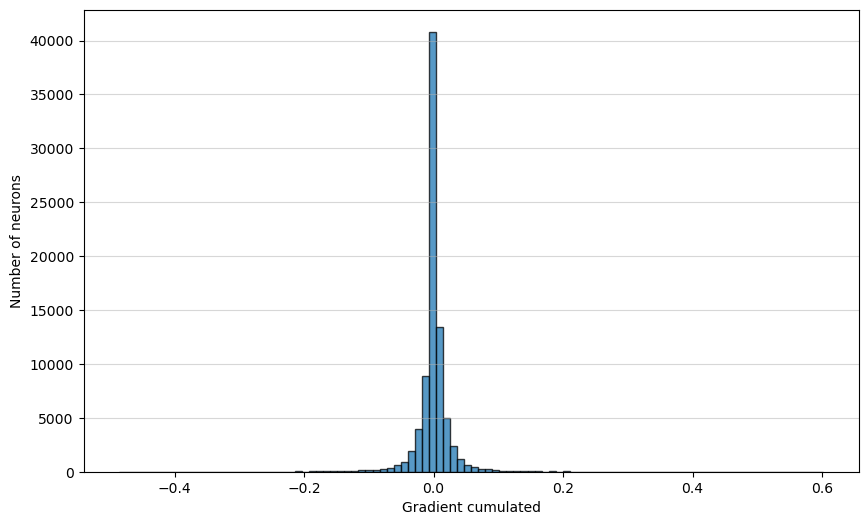

In [4]:
with open('../results/experiment_2_1/historical_dataA.pkl', 'rb') as file: 
    data = pickle.load(file)

grad_distr = np.array([])

for layer in data['grad_hist_dict']['raw']:
    grad_distr = np.concatenate((grad_distr, data['grad_hist_dict']['raw'][layer]))

print(f'MAX VALUE: {np.max(grad_distr)}')
print(f'MIN VALUE: {np.min(grad_distr)}')

# Plotting the distribution of the array
plt.figure(figsize=(10, 6))
plt.hist(grad_distr, bins=100, alpha=0.75, color='tab:blue', edgecolor='black')
# plt.title('Distribution of gradients cumulation')
plt.xlabel('Gradient cumulated')
plt.ylabel('Number of neurons')
plt.grid(axis='y', alpha=0.5)  # This makes the grid lines horizontal
plt.show()


#### Distribution of busy neurons across layers

0.9999999999999998


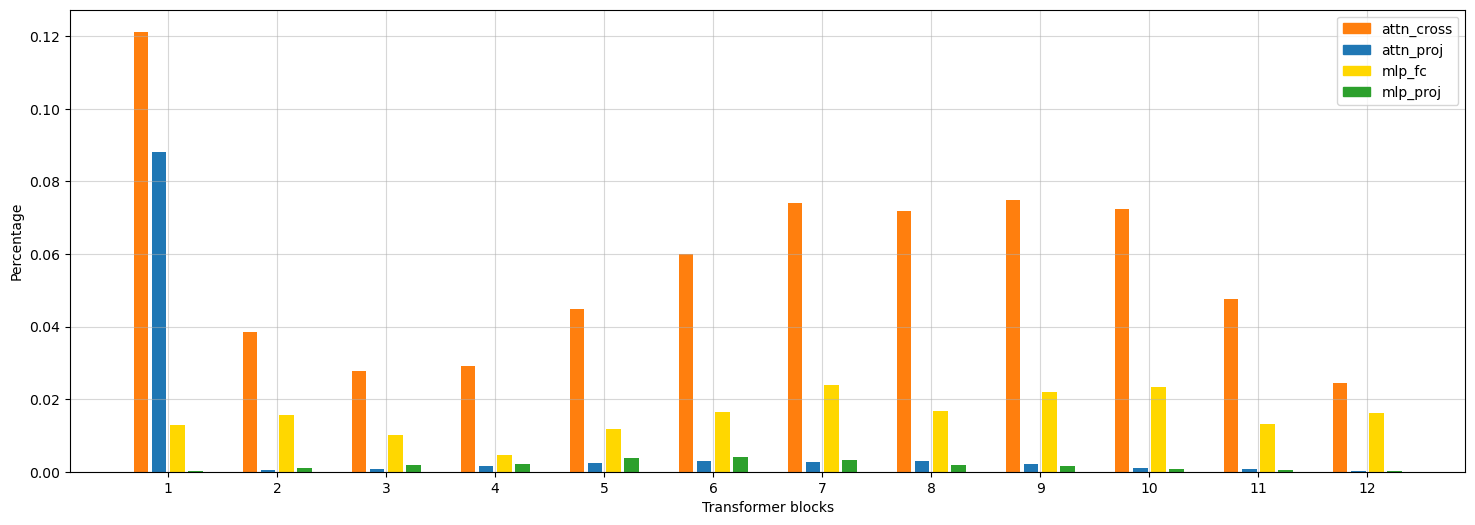

In [10]:
t=4000

# Sample dictionary with numpy arrays as values
data, num_neurons, count = stubborn_extraction(
    historical_path='../results/experiment_2_1/historical_dataA.pkl',
    norm=False,
    inverse=True,
    threshold=t,
    return_stubborn=False
    )


x_labels = [f"{k.split('.')[-2]}.{k.split('.')[-1]}.{k.split('.')[-3]}" for k in data.keys()]

# Extract the lengths of the numpy arrays
lengths = [(len(v[0])) / t for v in data.values()]

print(sum(lengths))

# Define the repeating color pattern
colors = ['tab:orange', 'tab:blue', 'gold', 'tab:green']
color_labels = ['attn_cross', 'attn_proj', 'mlp_fc', 'mlp_proj']

# Create the histogram
fig, ax = plt.subplots(1, 1, figsize=(18, 6), sharey=True)

# Define the new positions with larger gaps between groups
positions = []
gap = 2  # Increase the gap between groups
for i in range(len(lengths)):
    group = i // 4
    pos = i + group * gap  # Add a gap of 'gap' between groups
    positions.append(pos)

bars = ax.bar(positions, lengths, color=[colors[i % len(colors)] for i in range(len(lengths))])

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Transformer blocks')

# Set xticks to the center of each group
group_centers = [(1.5 + i * 4 + i * gap) for i in range(12)]
ax.set_xticks(group_centers)
ax.set_xticklabels([str(i + 1) for i in range(12)])

# Create legend
patches = [mpatches.Patch(color=colors[i], label=color_labels[i]) for i in range(len(colors))]
ax.legend(handles=patches)

# Add transparent grid
ax.grid(True, alpha=0.5)

# Display the plot
plt.show()

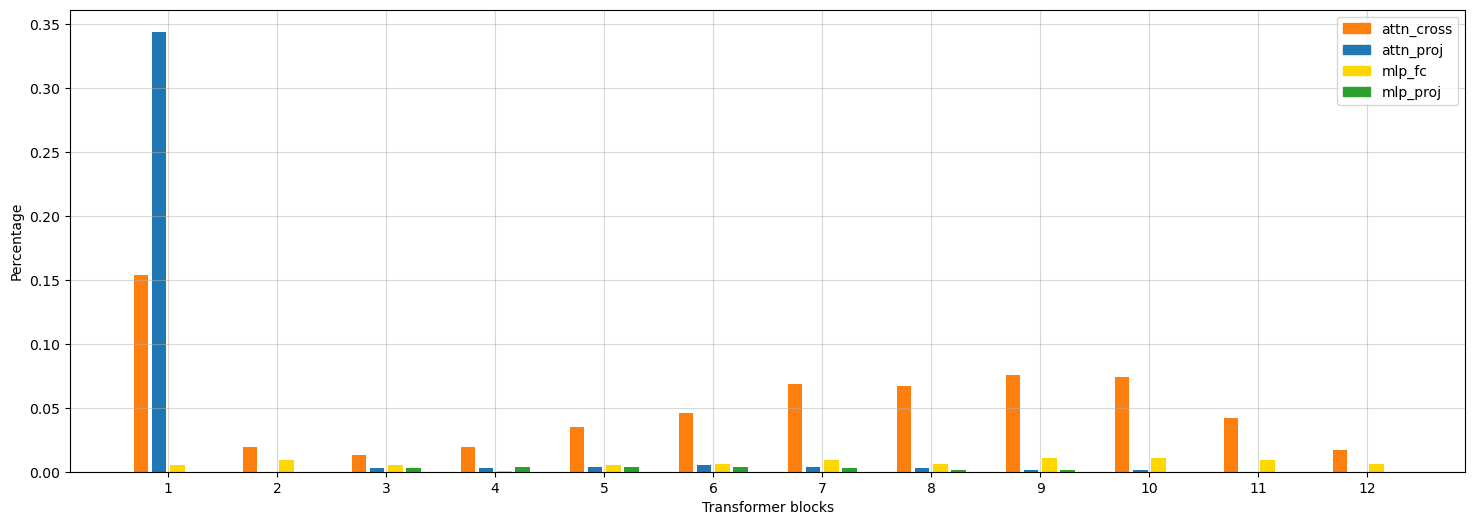

In [11]:
t=2000

# Sample dictionary with numpy arrays as values
data, num_neurons, count = stubborn_extraction(
    historical_path='../results/experiment_2_1/historical_dataA.pkl',
    norm=False,
    inverse=True,
    threshold=t,
    return_stubborn=False
    )


x_labels = [f"{k.split('.')[-2]}.{k.split('.')[-1]}.{k.split('.')[-3]}" for k in data.keys()]

# Extract the lengths of the numpy arrays
lengths = [(len(v[0])) / num_neurons[i] for i,v in enumerate(data.values())]

# Define the repeating color pattern
colors = ['tab:orange', 'tab:blue', 'gold', 'tab:green']
color_labels = ['attn_cross', 'attn_proj', 'mlp_fc', 'mlp_proj']

# Create the histogram
fig, ax = plt.subplots(1, 1, figsize=(18, 6), sharey=True)

# Define the new positions with larger gaps between groups
positions = []
gap = 2  # Increase the gap between groups
for i in range(len(lengths)):
    group = i // 4
    pos = i + group * gap  # Add a gap of 'gap' between groups
    positions.append(pos)

bars = ax.bar(positions, lengths, color=[colors[i % len(colors)] for i in range(len(lengths))])

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Transformer blocks')

# Set xticks to the center of each group
group_centers = [(1.5 + i * 4 + i * gap) for i in range(12)]
ax.set_xticks(group_centers)
ax.set_xticklabels([str(i + 1) for i in range(12)])

# Create legend
patches = [mpatches.Patch(color=colors[i], label=color_labels[i]) for i in range(len(colors))]
ax.legend(handles=patches)

# Add transparent grid
ax.grid(True, alpha=0.5)

# Display the plot
plt.show()

In [3]:
t=8000

# Sample dictionary with numpy arrays as values
busy_H, _, _ = stubborn_extraction(
    historical_path='../experiments/gpt2-small/experiment_2_3/historical_data_gen.pkl',
    norm=False,
    threshold=0,
    inverse=True,
    num_threshold=t,
    return_stubborn=False
    )

# Sample dictionary with numpy arrays as values
busy_A, _, _ = stubborn_extraction(
    historical_path='../experiments/gpt2-small/experiment_2_3/historical_data.pkl',
    norm=False,
    threshold=0,
    inverse=True,
    num_threshold=t,
    return_stubborn=False
    )


# Sample dictionary with numpy arrays as values
spec_busy_A, _, _ = stubborn_extraction(
    historical_path='../experiments/gpt2-small/experiment_2_3/historical_data.pkl',
    norm=True,
    threshold=0,
    inverse=True,
    num_threshold=t,
    return_stubborn=False
    )


# Sample dictionary with numpy arrays as values
free_H, _, _ = stubborn_extraction(
    historical_path='../experiments/gpt2-small/experiment_2_3/historical_data_gen.pkl',
    norm=False,
    threshold=0,
    inverse=False,
    num_threshold=t,
    return_stubborn=False
    )

# Sample dictionary with numpy arrays as values
free_A, _, _ = stubborn_extraction(
    historical_path='../experiments/gpt2-small/experiment_2_3/historical_data.pkl',
    norm=False,
    threshold=0,
    inverse=False,
    num_threshold=t,
    return_stubborn=False
    )


# Sample dictionary with numpy arrays as values
spec_free_A, _, _ = stubborn_extraction(
    historical_path='../experiments/gpt2-small/experiment_2_3/historical_data.pkl',
    norm=True,
    threshold=0,
    inverse=False,
    num_threshold=t,
    return_stubborn=False
    )

print(len(busy_A['transformer.h.0.attn.c_attn']))


tot = 0
for layer in spec_free_A:
    print(f'LAYER: {layer} - {len(spec_busy_A[layer][0])} elements')
    a = np.intersect1d(spec_free_A[layer][0], free_A[layer][0])
    b = np.intersect1d(spec_free_A[layer][0], free_H[layer][0])
    c = np.intersect1d(spec_free_A[layer][0], busy_A[layer][0])
    d = np.intersect1d(spec_free_A[layer][0], busy_H[layer][0])
    
    e = np.intersect1d(spec_busy_A[layer][0], free_A[layer][0])
    f = np.intersect1d(spec_busy_A[layer][0], free_H[layer][0])
    g = np.intersect1d(spec_busy_A[layer][0], busy_A[layer][0])
    h = np.intersect1d(spec_busy_A[layer][0], busy_H[layer][0])

    f = np.intersect1d(busy_A[layer][0], busy_H[layer][0])


    mid_AF = 1 - (len(a)+len(c))/(len(spec_free_A[layer][0])+1e-6)
    mid_HF = 1 - ((len(b)+len(d)))/(len(spec_free_A[layer][0])+1e-6)

    mid_AB = 1 - (len(e)+len(g))/(len(spec_busy_A[layer][0])+1e-6)
    mid_HB = 1 - ((len(f)+len(h)))/(len(spec_busy_A[layer][0])+1e-6)
    
    print(f'Overlapping spec_free_A-free_A: {len(a)/(len(spec_free_A[layer][0])+1e-6)}')
    print(f'Overlapping spec_free_A-free_H: {len(b)/(len(spec_free_A[layer][0])+1e-6)}')
    print(f'Overlapping spec_free_A-busy_A: {len(c)/(len(spec_free_A[layer][0])+1e-6)}')
    print(f'Overlapping spec_free_A-busy_H: {len(d)/(len(spec_free_A[layer][0])+1e-6)}')
    print(f'MID A: {mid_AF} - MID H:{mid_HF}')

    print(f'Overlapping spec_busy_A-free_A: {len(e)/(len(spec_busy_A[layer][0])+1e-6)}')
    print(f'Overlapping spec_busy_A-free_H: {len(f)/(len(spec_busy_A[layer][0])+1e-6)}')
    print(f'Overlapping spec_busy_A-busy_A: {len(g)/(len(spec_busy_A[layer][0])+1e-6)}')
    print(f'Overlapping spec_busy_A-busy_H: {len(h)/(len(spec_busy_A[layer][0])+1e-6)}')
    print(f'MID A: {mid_AB} - MID H:{mid_HB}')
    tot+=len(f)

    print()

print()
print(tot/t)


TypeError: stubborn_extraction() got an unexpected keyword argument 'num_threshold'